# Building a Simple Bot with the Rasa Stack
![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaX3LNhGcAe1HnPZSuWS0oH6af0LJHXcH7If1sQgLCFAT1chNGFg)


### Please make a copy of this notebook first!

If you're interested in building chatbots or voice apps with the [Rasa Stack](https://rasa.com/products/rasa-stack/), you've come to the right place! 
In this notebook you'll build a complete chatbot with Rasa Stack, without having to install anything on your computer. 

Using Colaboratory, everything will get installed in a cloud machine for you, so you can focus on creating an interesting bot. 

We'll build a relatively simple bot, that just asks you about your mood and tries to cheer you up if you're feeling a bit down. 

The tutorial consists of three parts:



*   Part 1: We'll start with a basic bot that can handle multi-turn dialogues but not understand natural language like "I'm doing well"
*   Part 2: We'll add the abilitiy to understand natural language so that the bot can generalise to similar inputs that it hasn't seen before
*   Part 3: We'll give you further resources so you can build your own.





# Part 1: Build a basic bot

### Installation
First we'll have to install Rasa Core on the server running this notebook. In this first step, your bot won't understand natural language yet. This happens in Step 2. **Run the cell below, this will take a couple of minutes to complete so this is a good time to scroll through the rest of the notebook.**

**Make sure to install the correct version. If you want to experiment with the latest master, use**: 

`!pip install -U git+https://github.com/rasahq/rasa_core.git`

In [1]:
!pip install rasa_core;

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

    100% |████████████████████████████████| 143kB 5.0MB/s 
    100% |████████████████████████████████| 307kB 5.2MB/s 
    100% |████████████████████████████████| 51kB 6.3MB/s 
    100% |████████████████████████████████| 71kB 4.4MB/s 
    100% |████████████████████████████████| 645kB 7.0MB/s 
    100% |████████████████████████████████| 71kB 11.2MB/s 
    100% |████████████████████████████████| 143kB 7.3MB/s 
    100% |████████████████████████████████| 860kB 9.4MB/s 
    100% |████████████████████████████████| 51kB 19.9MB/s 


    100% |████████████████████████████████| 61kB 18.0MB/s 
    100% |████████████████████████████████| 49.1MB 827kB/s 
    100% |████████████████████████████████| 92kB 21.6MB/s 
    100% |████████████████████████████████| 204kB 23.7MB/s 
    100% |████████████████████████████████| 51kB 15.0MB/s 
    100% |████████████████████████████████| 81kB 20.4MB/s 
    100% |████████████████████████████████| 4.6MB 6.5MB/s 
    100% |████████████████████████████████| 133kB 24.4MB/s 
    100% |████████████████████████████████| 286kB 19.6MB/s 


    100% |████████████████████████████████| 81kB 22.2MB/s 
    100% |████████████████████████████████| 3.1MB 8.4MB/s 
    100% |████████████████████████████████| 51kB 18.5MB/s 
    100% |████████████████████████████████| 71kB 18.9MB/s 
    100% |████████████████████████████████| 51kB 12.7MB/s 
    100% |████████████████████████████████| 4.4MB 5.9MB/s 
    100% |████████████████████████████████| 61kB 20.3MB/s 
    9% |███                             | 296kB 39.4MB/s eta 0:00:01

    100% |████████████████████████████████| 3.1MB 8.3MB/s 
    100% |████████████████████████████████| 890kB 11.3MB/s 
    100% |████████████████████████████████| 552kB 18.5MB/s 
    100% |████████████████████████████████| 153kB 26.4MB/s 
    100% |████████████████████████████████| 61kB 19.5MB/s 
  Running setup.py bdist_wheel for slackclient ... - done
  Stored in directory: /content/.cache/pip/wheels/9b/98/ba/f96daa1eefaf60cba7f95d087b2d86c5169127b3624142b586
  Running setup.py bdist_wheel for ConfigArgParse ... - done
  Stored in directory: /content/.cache/pip/wheels/76/11/eb/12113becd46c0e8a70b8a63f9405e46a1f61d4aaa8532d676b
  Running setup.py bdist_wheel for jsonpickle ... - done
  Stored in directory: /content/.cache/pip/wheels/07/8b/41/8ce98f4737a9ff61b1bf2673f2abfe66a6a43ad6e91d2c9736
  Running setup.py bdist_wheel for pathlib ... - done
  Stored in directory: /content/.cache/pip/wheels/f9/b2/4a/68efdfe5093638a9918bd1bb734af625526e849487200aa171
  Running setup.py bdist

  Running setup.py bdist_wheel for tzlocal ... - \ done
  Stored in directory: /content/.cache/pip/wheels/15/ae/df/a67bf1ed84e9bf230187d36d8dcfd30072bea0236cb059ed91
  Running setup.py bdist_wheel for itsdangerous ... - done
  Stored in directory: /content/.cache/pip/wheels/2c/4a/61/5599631c1554768c6290b08c02c72d7317910374ca602ff1e5
  Running setup.py bdist_wheel for docopt ... - done
  Stored in directory: /content/.cache/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
  Running setup.py bdist_wheel for Twisted ... - \ | / - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/a9/85/24/fc82998fb686cb31e65a26c027a20120fd1219c9f1e925913a
  Running setup.py bdist_wheel for html5lib ... - \ done
  Stored in directory: /content/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
  Running setup.py bdist_wheel for zope.interface ... - \ | done
  Stored in directory: /content/.cache

### Writing Stories

A good place to start is by writing a few stories. These are example conversations that Rasa Core will learn from. 

The format works like this:

A story starts with `##` and you can give it a name. 
lines that start with `*` are messages sent by the user. Although you don't write the *actual* message, but rather the intent (and the entities) that represent what the user *means*. If you don't know about intents and entities, don't worry! We will talk about them more later. 
Lines that start with `-` are *actions* taken by your bot. In this case all of our actions are just messages sent back to the user, like `utter_greet`, but in general an action can do anything, including calling an API and interacting with the outside world. 

In [2]:
stories_md = """
## Transfer               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_transfer{"amount": "$200", "fromAcct": "from", "toAcct": "to", "date": "tomorrow"}
  - utter_transfer
  - utter_confirm
* mood_goodbye
  - utter_goodbye
  
  
## Transfer path 2               <!-- this is already the start of the next story -->
* greet              
  - utter_greet
* mood_partialtransfer{"amount": "$100", "date": "next week"}
  - utter_needtransfer
* mood_transfer{"amount": "$100", "fromAcct": "from", "toAcct": "to", "date": "next week"}
  - utter_transfer
  - utter_confirm
* mood_goodbye
  - utter_goodbye
  

## Transfer path 3
* greet              
  - utter_greet
* mood_partialtransfer{"amount": "$30", "date": "in two days"}
  - utter_needtransfer
* mood_partialtransfer{"amount": "$30", "fromAcct": "from", "date": "in two days"}
  - utter_needtransfer
* mood_transfer{"amount": "$30", "fromAcct": "from", "toAcct": "to", "date": "in two days"}
  - utter_transfer
  - utter_confirm
* mood_goodbye
  - utter_goodbye

"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


### Defining a Domain

The domain specifies the universe that your bot lives in. You should list all of the intents and actions that show up in your stories. 
This is also the place to write templates, which contain the messages your bot can send back

In [3]:
domain_yml = """
intents:
  - greet
  - goodbye
  - mood_transfer
  - mood_confirm
  - mood_goodbye
  - mood_partialtransfer
  
entities:
  - amount
  - fromAcct
  - toAcct
  - date
  
slots:
  amount:
    type: text
  fromAcct:
    type: text
  toAcct:
    type: text
  date:
    type: text

actions:
- utter_greet
- utter_needtransfer
- utter_transfer
- utter_confirm
- utter_goodbye

templates:
  utter_greet:
  - text: "Hey! How are you? What would you like to transfer?"

  utter_needtransfer:
  - text: "I need some additional information to complete the transfer. 
          What is the from account, to account, amount, and date?"
  
  utter_transfer:
  - text: "Thank you for that information!"

  utter_confirm:
  - text: "I have completed the tranfer! Did that look correct?"

  utter_goodbye:
  - text: "Bye"
"""

%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


### Training your Dialogue Model

Now comes the fun part! We're going to show Rasa Core the stories we wrote above, and train a model on these examples. 
In this case, the model is a neural network implemented in Keras which learns to predict which action to take next. 

In [6]:
from rasa_core.policies.keras_policy import KerasPolicy
from rasa_core.agent import Agent

agent = Agent('domain.yml', policies=[KerasPolicy()])
training_data = agent.load_data('stories.md')
agent.train(
        training_data,
        validation_split=0.0,
        epochs=400
)

agent.persist('models/dialogue')

/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
Processed Story Blocks: 100%|██████████| 3/3 [00:00<00:00, 206.83it/s, # trackers=1]
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers:  20%|██        | 4/20 [00:00<00:00, 24.56it/s, # actions=34]

Processed trackers: 100%|██████████| 20/20 [00:00<00:00, 21.86it/s, # actions=38]
INFO:rasa_core.featurizers:Created 38 action examples.
INFO:rasa_core.policies.keras_policy:Fitting model with 38 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 5, 22)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                7040      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
Total params: 7,304
Trainable params: 7,304
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
38/38 [==============================] - 1s 13ms/step - loss: 2.0106 - acc: 0.2895
Epoch 2/400
38/38 [==============================] - 0s 540us/step - loss: 1.9711 - acc: 0.3684
Epoch 3/400
38/38 [==============================] - 0s 407us/step - loss: 1.9140

38/38 [==============================] - 0s 509us/step - loss: 1.6253 - acc: 0.3947
Epoch 22/400
38/38 [==============================] - 0s 415us/step - loss: 1.6403 - acc: 0.3684
Epoch 23/400
38/38 [==============================] - 0s 547us/step - loss: 1.6653 - acc: 0.3684
Epoch 24/400
38/38 [==============================] - 0s 497us/step - loss: 1.6022 - acc: 0.3684
Epoch 25/400
38/38 [==============================] - 0s 528us/step - loss: 1.6009 - acc: 0.3421
Epoch 26/400
38/38 [==============================] - 0s 371us/step - loss: 1.6039 - acc: 0.3684
Epoch 27/400
38/38 [==============================] - 0s 488us/step - loss: 1.5767 - acc: 0.3947
Epoch 28/400
38/38 [==============================] - 0s 551us/step - loss: 1.5681 - acc: 0.3684
Epoch 29/400
38/38 [==============================] - 0s 472us/step - loss: 1.5554 - acc: 0.3947
Epoch 30/400
38/38 [==============================] - 0s 565us/step - loss: 1.5312 - acc: 0.3684
Epoch 31/400
38/38 [=======================

38/38 [==============================] - 0s 528us/step - loss: 1.4073 - acc: 0.4474
Epoch 48/400
38/38 [==============================] - 0s 535us/step - loss: 1.3780 - acc: 0.5000
Epoch 49/400
38/38 [==============================] - 0s 570us/step - loss: 1.3941 - acc: 0.4211
Epoch 50/400
38/38 [==============================] - 0s 565us/step - loss: 1.3636 - acc: 0.3947
Epoch 51/400
38/38 [==============================] - 0s 512us/step - loss: 1.3842 - acc: 0.4474
Epoch 52/400
38/38 [==============================] - 0s 406us/step - loss: 1.3290 - acc: 0.5263
Epoch 53/400
38/38 [==============================] - 0s 509us/step - loss: 1.3405 - acc: 0.5000
Epoch 54/400
38/38 [==============================] - 0s 558us/step - loss: 1.2919 - acc: 0.6053
Epoch 55/400
38/38 [==============================] - 0s 467us/step - loss: 1.3342 - acc: 0.4737
Epoch 56/400
38/38 [==============================] - 0s 474us/step - loss: 1.3445 - acc: 0.5000
Epoch 57/400
38/38 [=======================

38/38 [==============================] - 0s 550us/step - loss: 1.1124 - acc: 0.6579
Epoch 74/400
38/38 [==============================] - 0s 410us/step - loss: 1.1127 - acc: 0.6316
Epoch 75/400
38/38 [==============================] - 0s 497us/step - loss: 1.1378 - acc: 0.5789
Epoch 76/400
38/38 [==============================] - 0s 616us/step - loss: 1.0918 - acc: 0.5526
Epoch 77/400
38/38 [==============================] - 0s 517us/step - loss: 1.0714 - acc: 0.6316
Epoch 78/400
38/38 [==============================] - 0s 525us/step - loss: 1.0541 - acc: 0.6316
Epoch 79/400
38/38 [==============================] - 0s 431us/step - loss: 1.0346 - acc: 0.5789
Epoch 80/400
38/38 [==============================] - 0s 490us/step - loss: 1.0181 - acc: 0.6316
Epoch 81/400
38/38 [==============================] - 0s 453us/step - loss: 1.0137 - acc: 0.7368
Epoch 82/400
38/38 [==============================] - 0s 490us/step - loss: 1.0692 - acc: 0.6316
Epoch 83/400
38/38 [=======================

38/38 [==============================] - 0s 464us/step - loss: 0.8697 - acc: 0.7632
Epoch 100/400
38/38 [==============================] - 0s 455us/step - loss: 0.9093 - acc: 0.7895
Epoch 101/400
38/38 [==============================] - 0s 519us/step - loss: 0.8620 - acc: 0.7632
Epoch 102/400
38/38 [==============================] - 0s 447us/step - loss: 0.8642 - acc: 0.8158
Epoch 103/400
38/38 [==============================] - 0s 395us/step - loss: 0.8892 - acc: 0.7895
Epoch 104/400
38/38 [==============================] - 0s 452us/step - loss: 0.9012 - acc: 0.7368
Epoch 105/400
38/38 [==============================] - 0s 512us/step - loss: 0.8628 - acc: 0.7895
Epoch 106/400
38/38 [==============================] - 0s 490us/step - loss: 0.8060 - acc: 0.8158
Epoch 107/400
38/38 [==============================] - 0s 486us/step - loss: 0.8976 - acc: 0.7105
Epoch 108/400
38/38 [==============================] - 0s 531us/step - loss: 0.8792 - acc: 0.7105
Epoch 109/400
38/38 [=============

38/38 [==============================] - 0s 489us/step - loss: 0.7561 - acc: 0.8158
Epoch 125/400
38/38 [==============================] - 0s 509us/step - loss: 0.7540 - acc: 0.8158
Epoch 126/400
38/38 [==============================] - 0s 451us/step - loss: 0.7098 - acc: 0.8947
Epoch 127/400
38/38 [==============================] - 0s 420us/step - loss: 0.6765 - acc: 0.8421
Epoch 128/400
38/38 [==============================] - 0s 513us/step - loss: 0.7114 - acc: 0.7632
Epoch 129/400
38/38 [==============================] - 0s 497us/step - loss: 0.7416 - acc: 0.7632
Epoch 130/400
38/38 [==============================] - 0s 453us/step - loss: 0.6774 - acc: 0.8421
Epoch 131/400
38/38 [==============================] - 0s 476us/step - loss: 0.7054 - acc: 0.8421
Epoch 132/400
38/38 [==============================] - 0s 491us/step - loss: 0.6648 - acc: 0.8684
Epoch 133/400
38/38 [==============================] - 0s 453us/step - loss: 0.7088 - acc: 0.8421
Epoch 134/400
38/38 [=============

38/38 [==============================] - 0s 575us/step - loss: 0.5954 - acc: 0.9211
Epoch 150/400
38/38 [==============================] - 0s 453us/step - loss: 0.6666 - acc: 0.8684
Epoch 151/400
38/38 [==============================] - 0s 469us/step - loss: 0.6109 - acc: 0.9474
Epoch 152/400
38/38 [==============================] - 0s 487us/step - loss: 0.5931 - acc: 0.8947
Epoch 153/400
38/38 [==============================] - 0s 476us/step - loss: 0.5771 - acc: 0.9211
Epoch 154/400
38/38 [==============================] - 0s 468us/step - loss: 0.5781 - acc: 0.8684
Epoch 155/400
38/38 [==============================] - 0s 617us/step - loss: 0.5623 - acc: 0.9474
Epoch 156/400
38/38 [==============================] - 0s 557us/step - loss: 0.5454 - acc: 0.8684
Epoch 157/400
38/38 [==============================] - 0s 479us/step - loss: 0.5340 - acc: 0.9474
Epoch 158/400
38/38 [==============================] - 0s 490us/step - loss: 0.5110 - acc: 0.9211
Epoch 159/400
38/38 [=============

38/38 [==============================] - 0s 529us/step - loss: 0.4411 - acc: 0.9737
Epoch 175/400
38/38 [==============================] - 0s 494us/step - loss: 0.4991 - acc: 0.9211
Epoch 176/400
38/38 [==============================] - 0s 485us/step - loss: 0.5062 - acc: 0.9211
Epoch 177/400
38/38 [==============================] - 0s 516us/step - loss: 0.4711 - acc: 0.9211
Epoch 178/400
38/38 [==============================] - 0s 505us/step - loss: 0.4438 - acc: 0.9474
Epoch 179/400
38/38 [==============================] - 0s 483us/step - loss: 0.4206 - acc: 0.9737
Epoch 180/400
38/38 [==============================] - 0s 499us/step - loss: 0.4556 - acc: 0.9474
Epoch 181/400
38/38 [==============================] - 0s 460us/step - loss: 0.5043 - acc: 0.9211
Epoch 182/400
38/38 [==============================] - 0s 471us/step - loss: 0.4550 - acc: 0.9211
Epoch 183/400
38/38 [==============================] - 0s 462us/step - loss: 0.4084 - acc: 0.9474
Epoch 184/400
38/38 [=============

38/38 [==============================] - 0s 476us/step - loss: 0.3917 - acc: 0.9474
Epoch 199/400
38/38 [==============================] - 0s 480us/step - loss: 0.3801 - acc: 0.9737
Epoch 200/400
38/38 [==============================] - 0s 479us/step - loss: 0.4077 - acc: 0.9474
Epoch 201/400
38/38 [==============================] - 0s 543us/step - loss: 0.3838 - acc: 0.9211
Epoch 202/400
38/38 [==============================] - 0s 430us/step - loss: 0.3647 - acc: 0.9737
Epoch 203/400
38/38 [==============================] - 0s 415us/step - loss: 0.3496 - acc: 0.9737
Epoch 204/400
38/38 [==============================] - 0s 475us/step - loss: 0.3873 - acc: 0.9211
Epoch 205/400
38/38 [==============================] - 0s 405us/step - loss: 0.3852 - acc: 0.9474
Epoch 206/400
38/38 [==============================] - 0s 447us/step - loss: 0.3507 - acc: 0.9211
Epoch 207/400
38/38 [==============================] - 0s 465us/step - loss: 0.3487 - acc: 0.9474
Epoch 208/400
38/38 [=============

Epoch 223/400
38/38 [==============================] - 0s 594us/step - loss: 0.2795 - acc: 1.0000
Epoch 224/400
38/38 [==============================] - 0s 527us/step - loss: 0.3355 - acc: 0.9211
Epoch 225/400
38/38 [==============================] - 0s 448us/step - loss: 0.2574 - acc: 1.0000
Epoch 226/400
38/38 [==============================] - 0s 467us/step - loss: 0.2955 - acc: 0.9737
Epoch 227/400
38/38 [==============================] - 0s 575us/step - loss: 0.2722 - acc: 1.0000
Epoch 228/400
38/38 [==============================] - 0s 533us/step - loss: 0.2705 - acc: 1.0000
Epoch 229/400
38/38 [==============================] - 0s 586us/step - loss: 0.2481 - acc: 1.0000
Epoch 230/400
38/38 [==============================] - 0s 484us/step - loss: 0.2451 - acc: 0.9737
Epoch 231/400
38/38 [==============================] - 0s 589us/step - loss: 0.2327 - acc: 0.9737
Epoch 232/400
38/38 [==============================] - 0s 549us/step - loss: 0.2791 - acc: 1.0000
Epoch 233/400
38/38 

Epoch 250/400
38/38 [==============================] - 0s 533us/step - loss: 0.1989 - acc: 1.0000
Epoch 251/400
38/38 [==============================] - 0s 529us/step - loss: 0.2436 - acc: 1.0000
Epoch 252/400
38/38 [==============================] - 0s 587us/step - loss: 0.2299 - acc: 0.9737
Epoch 253/400
38/38 [==============================] - 0s 477us/step - loss: 0.2008 - acc: 0.9737
Epoch 254/400
38/38 [==============================] - 0s 616us/step - loss: 0.2050 - acc: 0.9737
Epoch 255/400
38/38 [==============================] - 0s 553us/step - loss: 0.1946 - acc: 1.0000
Epoch 256/400
38/38 [==============================] - 0s 445us/step - loss: 0.1858 - acc: 1.0000
Epoch 257/400
38/38 [==============================] - 0s 502us/step - loss: 0.1895 - acc: 1.0000
Epoch 258/400
38/38 [==============================] - 0s 537us/step - loss: 0.1897 - acc: 1.0000
Epoch 259/400
38/38 [==============================] - 0s 518us/step - loss: 0.2021 - acc: 0.9737
Epoch 260/400
38/38 

38/38 [==============================] - 0s 560us/step - loss: 0.1826 - acc: 0.9737
Epoch 276/400
38/38 [==============================] - 0s 437us/step - loss: 0.1443 - acc: 1.0000
Epoch 277/400
38/38 [==============================] - 0s 541us/step - loss: 0.1532 - acc: 0.9737
Epoch 278/400
38/38 [==============================] - 0s 481us/step - loss: 0.1395 - acc: 1.0000
Epoch 279/400
38/38 [==============================] - 0s 512us/step - loss: 0.1553 - acc: 0.9737
Epoch 280/400
38/38 [==============================] - 0s 462us/step - loss: 0.1725 - acc: 0.9737
Epoch 281/400
38/38 [==============================] - 0s 563us/step - loss: 0.1608 - acc: 1.0000
Epoch 282/400
38/38 [==============================] - 0s 547us/step - loss: 0.1852 - acc: 0.9737
Epoch 283/400
38/38 [==============================] - 0s 564us/step - loss: 0.1544 - acc: 0.9737
Epoch 284/400
38/38 [==============================] - 0s 487us/step - loss: 0.1195 - acc: 1.0000
Epoch 285/400
38/38 [=============

Epoch 300/400
38/38 [==============================] - 0s 494us/step - loss: 0.1007 - acc: 1.0000
Epoch 301/400
38/38 [==============================] - 0s 545us/step - loss: 0.1141 - acc: 1.0000
Epoch 302/400
38/38 [==============================] - 0s 398us/step - loss: 0.1228 - acc: 0.9737
Epoch 303/400
38/38 [==============================] - 0s 481us/step - loss: 0.1222 - acc: 0.9737
Epoch 304/400
38/38 [==============================] - 0s 481us/step - loss: 0.1130 - acc: 1.0000
Epoch 305/400
38/38 [==============================] - 0s 530us/step - loss: 0.0870 - acc: 1.0000
Epoch 306/400
38/38 [==============================] - 0s 500us/step - loss: 0.1113 - acc: 0.9737
Epoch 307/400
38/38 [==============================] - 0s 402us/step - loss: 0.1095 - acc: 0.9737
Epoch 308/400
38/38 [==============================] - 0s 466us/step - loss: 0.0962 - acc: 1.0000
Epoch 309/400
38/38 [==============================] - 0s 450us/step - loss: 0.1104 - acc: 1.0000
Epoch 310/400
38/38 

38/38 [==============================] - 0s 497us/step - loss: 0.0791 - acc: 1.0000
Epoch 326/400
38/38 [==============================] - 0s 568us/step - loss: 0.0813 - acc: 1.0000
Epoch 327/400
38/38 [==============================] - 0s 541us/step - loss: 0.1155 - acc: 0.9737
Epoch 328/400
38/38 [==============================] - 0s 479us/step - loss: 0.0915 - acc: 1.0000
Epoch 329/400
38/38 [==============================] - 0s 583us/step - loss: 0.0888 - acc: 1.0000
Epoch 330/400
38/38 [==============================] - 0s 543us/step - loss: 0.0837 - acc: 1.0000
Epoch 331/400
38/38 [==============================] - 0s 512us/step - loss: 0.0929 - acc: 0.9737
Epoch 332/400
38/38 [==============================] - 0s 510us/step - loss: 0.0813 - acc: 1.0000
Epoch 333/400
38/38 [==============================] - 0s 498us/step - loss: 0.0934 - acc: 0.9737
Epoch 334/400
38/38 [==============================] - 0s 579us/step - loss: 0.0766 - acc: 1.0000
Epoch 335/400
38/38 [=============

Epoch 349/400
38/38 [==============================] - 0s 583us/step - loss: 0.0835 - acc: 0.9737
Epoch 350/400
38/38 [==============================] - 0s 494us/step - loss: 0.0748 - acc: 1.0000
Epoch 351/400
38/38 [==============================] - 0s 490us/step - loss: 0.0740 - acc: 0.9737
Epoch 352/400
38/38 [==============================] - 0s 518us/step - loss: 0.0809 - acc: 0.9737
Epoch 353/400
38/38 [==============================] - 0s 505us/step - loss: 0.0657 - acc: 1.0000
Epoch 354/400
38/38 [==============================] - 0s 520us/step - loss: 0.0861 - acc: 0.9737
Epoch 355/400
38/38 [==============================] - 0s 514us/step - loss: 0.0824 - acc: 0.9737
Epoch 356/400
38/38 [==============================] - 0s 548us/step - loss: 0.0907 - acc: 0.9737
Epoch 357/400
38/38 [==============================] - 0s 492us/step - loss: 0.0594 - acc: 1.0000
Epoch 358/400
38/38 [==============================] - 0s 491us/step - loss: 0.0812 - acc: 0.9737
Epoch 359/400
38/38 

38/38 [==============================] - 0s 420us/step - loss: 0.0671 - acc: 1.0000
Epoch 375/400
38/38 [==============================] - 0s 400us/step - loss: 0.0739 - acc: 1.0000
Epoch 376/400
38/38 [==============================] - 0s 550us/step - loss: 0.0477 - acc: 1.0000
Epoch 377/400
38/38 [==============================] - 0s 476us/step - loss: 0.0762 - acc: 0.9737
Epoch 378/400
38/38 [==============================] - 0s 653us/step - loss: 0.0525 - acc: 1.0000
Epoch 379/400
38/38 [==============================] - 0s 492us/step - loss: 0.0476 - acc: 1.0000
Epoch 380/400
38/38 [==============================] - 0s 519us/step - loss: 0.0515 - acc: 1.0000
Epoch 381/400
38/38 [==============================] - 0s 509us/step - loss: 0.0489 - acc: 1.0000
Epoch 382/400
38/38 [==============================] - 0s 418us/step - loss: 0.0477 - acc: 1.0000
Epoch 383/400
38/38 [==============================] - 0s 522us/step - loss: 0.0486 - acc: 1.0000
Epoch 384/400
38/38 [=============

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Model directory models/dialogue exists and contains old model files. All files will be overwritten.
INFO:rasa_core.agent:Persisted model to '/content/models/dialogue'


### Starting up the bot
Lets start up the bot!


In [7]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue')

/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)


### Talking to the bot (no NLU)

In this step, we just trained the dialogue model - so basically the conversational flow. So the bot will only understand **structured** input and **no** natural language yet. Go try it out with typing  "/" + one of the intents from your domain before, e.g.:

/greet

/mood_affirm

/mood_deny

In [7]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
/greet
Hey! How are you? What would you like to transfer?
/mood_partialtransfer
I need some additional information to complete the transfer. What is the from account, to account, amount, and date?
/mood_transfer
Thank you for that information!
I have completed the tranfer! Did that look correct?
/mood_confirm
Bye


KeyboardInterrupt: ignored

# Part 2: Add natural language understanding

So far, our bot doesn't understand regular sentences with natural language yet.
To do that, we're going to build a language understanding model with Rasa NLU. 

### Installing NLU
We have to install a couple of more things in this notebook here. **Run the cell below** - in the meantime, you can check out the rest of the code.


In [12]:
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config && pip install pygraphviz;
!pip install rasa_nlu[spacy];
!python -m spacy download en;

  Using cached https://files.pythonhosted.org/packages/25/74/5b7befa513482e6dee1f3dd68171a6c9dfc14c0eaa00f885ffeba54fe9b0/sklearn_crfsuite-0.3.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/24/de/ac14cd453c98656d6738a5669f96a4ac7f668493d5e6b78227ac933c5fd4/spacy-2.0.12.tar.gz
  Using cached https://files.pythonhosted.org/packages/12/c2/11d6845db5edf1295bc08b2f488cf5937806586afe42936c3f34c097ebdc/tabulate-0.8.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/2f/86/cfcd71edca9d25d3d331209a20f6314b6f3f134c29478f90559cee9ce091/python_crfsuite-0.9.6-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5e/31/c8c1ecafa44db30579c8c457ac7a0f819e8b1dbc3e58308394fff5ff9ba7/murmurhash-0.28.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/f8/9e/273fbea507de99166c11cd0cb3fde1ac01b5bc724d9a407a2f927ede91a1/cymem-1.31.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/be/fc/09684555ce0ee7086675e

  Using cached https://files.pythonhosted.org/packages/22/4e/dcf124fd97e5f5611123d6ad9f40ffd6eb979d1efdc1049e28a795672fcd/msgpack-0.5.6-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/84/09/fc890664a7a1dd0a88f46c93fb9340d0a27a69e82095a4a54aef2ed94a6d/msgpack_numpy-0.4.3.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/36/f4/9728ba01ccb2f55df9a5af029b48ba0aaca1081bbd7823ea2ee223ba7a42/cytoolz-0.9.0.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/a0/47/66897906448185fcb77fc3c2b1bc20ed0ecca81a0f2f88eda3fc5a34fc3d/wrapt-1.10.11.tar.gz
  Running setup.py bdist_wheel for spacy ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | /

 - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/60/0b/bb/7c2e28db574dbb2358176934eddd32a1c5f838ba0bc23eaaab
  Running setup.py bdist_wheel for tabulate ... - done
  Stored in directory: /content/.cache/pip/wheels/2a/85/33/2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
  Running setup.py bdist_wheel for murmurhash ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... - \ done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1566d77f0f67701071ad13
  Running setup.py bdist_wheel for preshed ... - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/ca/e5/8b/73706d7232da301838e0bc5

  Running setup.py bdist_wheel for wrapt ... - \ done
  Stored in directory: /content/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built spacy tabulate murmurhash cymem preshed thinc ujson dill regex cytoolz wrapt
    100% |████████████████████████████████| 37.4MB 52.2MB/s 
  Running setup.py install for en-core-web-sm ... - \ done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



### Language Understanding


Lets create some training data here, grouping user messages by their `intent`s. The intent describes what the messages *mean*. 

In [9]:
nlu_md = """
## intent:greet
- hey
- hello
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- so sad
"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


### Train the Rasa NLU Model

We're going to train a model to recognise these intents, so that when we send a message like "hello" to our bot, it will recognise this as a "greet" intent.

In [11]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer

training_data = load_data('nlu.md')
pipeline = [{"name": "nlp_spacy"}, 
            {"name": "tokenizer_spacy"}, 
            {"name": "intent_featurizer_spacy"},  
            {"name": "intent_classifier_sklearn"}]
trainer = Trainer(RasaNLUModelConfig({"pipeline": pipeline}))
interpreter = trainer.train(training_data)
model_directory = trainer.persist('./projects/default/')

INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 68 (6 distinct intents)
	- Found intents: 'greet', 'mood_affirm', 'goodbye', 'mood_unhappy', 'mood_great', 'mood_deny'
	- entity examples: 0 (0 distinct entities)
	- found entities: 



Exception: ignored

### Starting up the bot (with NLU)

Now that we've trained the dialogue **and** language understanding models and saved them, we can start up an `Agent` which will handle conversations for us. 

In [11]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


### Talking to the Bot (with NLU)

We can start talking to the bot in natural language.

In [12]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])


Your bot is ready to talk! Type your messages here or send 'stop'
hello
Hey! How are you? What would you like to transfer?
I want to transfer $200 from checking to John tomorrow
I need some additional information to complete the transfer. What is the from account, to account, amount, and date?
bye
I need some additional information to complete the transfer. What is the from account, to account, amount, and date?


KeyboardInterrupt: ignored

### Pro Tip: Visualising the Training Data

You can visualise the stories to get a sense of how the conversations go. This is usually a good way to see if there are any stories which don't make sense


/usr/local/lib/python3.6/dist-packages/pykwalify/core.py:99: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  data = yaml.load(stream)
Processed Story Blocks: 100%|██████████| 3/3 [00:00<00:00, 271.67it/s, # trackers=1]


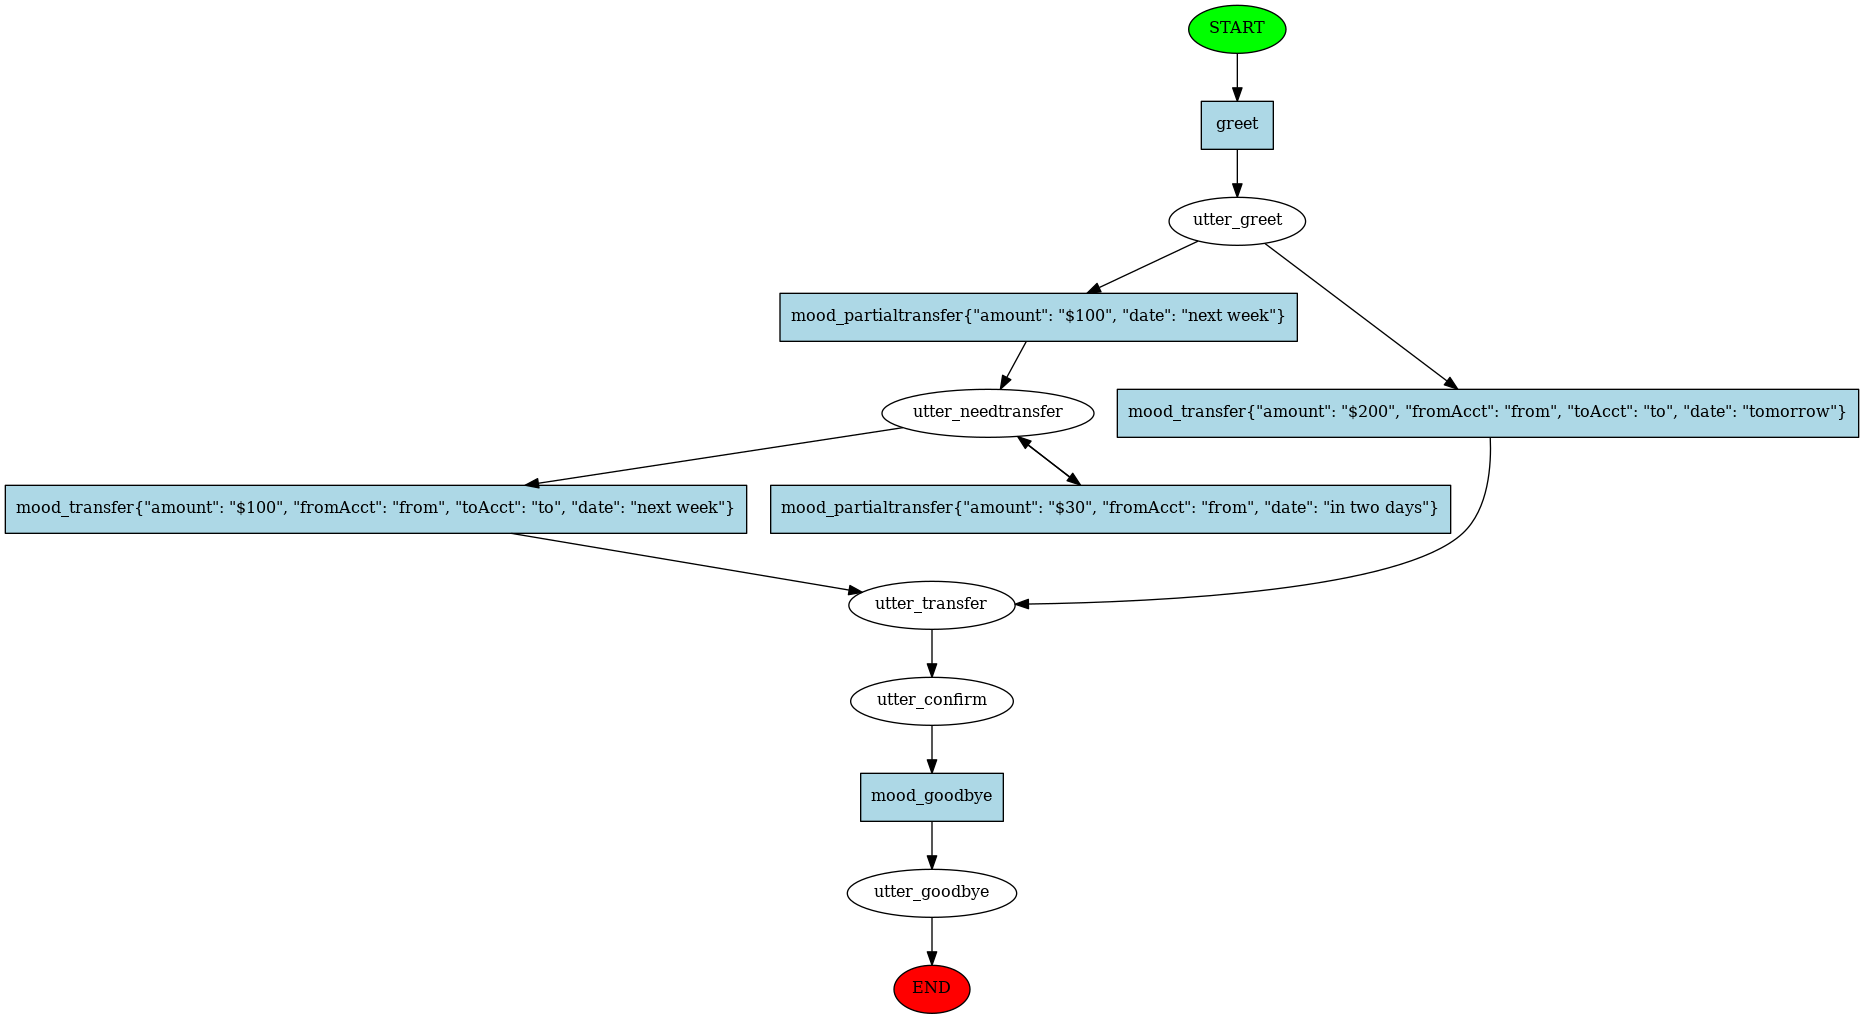

In [13]:
from rasa_core.agent import Agent
from IPython.display import Image

agent = Agent.load('models/dialogue')
agent.visualize("stories.md", "story_graph.png", max_history=2)
Image(filename="story_graph.png")

# Part 3: Next steps

Great job! You've built your first bot that uses Machine Learning to manage dialogues. As a next step, we'd suggest you start building your own bot. Here are a few useful links:



*   Install the Rasa Stack on your machine [here](https://core.rasa.ai/installation.html)
*   Learn how to bootstrap training data with the [interactive learning tutorial](https://core.rasa.ai/tutorial_interactive_learning.html)
*   Connect to the community in our [Gitter Chat](https://gitter.im/RasaHQ/rasa_core)



---




*Any feedback for this tutorial?* Please shoot us an email at hi@rasa.com